# Module 2: Exploration data analysis of train a model by given attributes

In [2]:
#import libraries for access and functional purpose
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [3]:
#read the given dataset
df = p.read_csv("dataset.csv")

In [4]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Spliting Train/Test:

In [7]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='cp', axis=1)
#Response variable
y = df.loc[:,'cp'] 

In [8]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of testing dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  212
Number of testing dataset:  91
Total number of dataset:  303


Text(0, 0.5, 'Strength values')

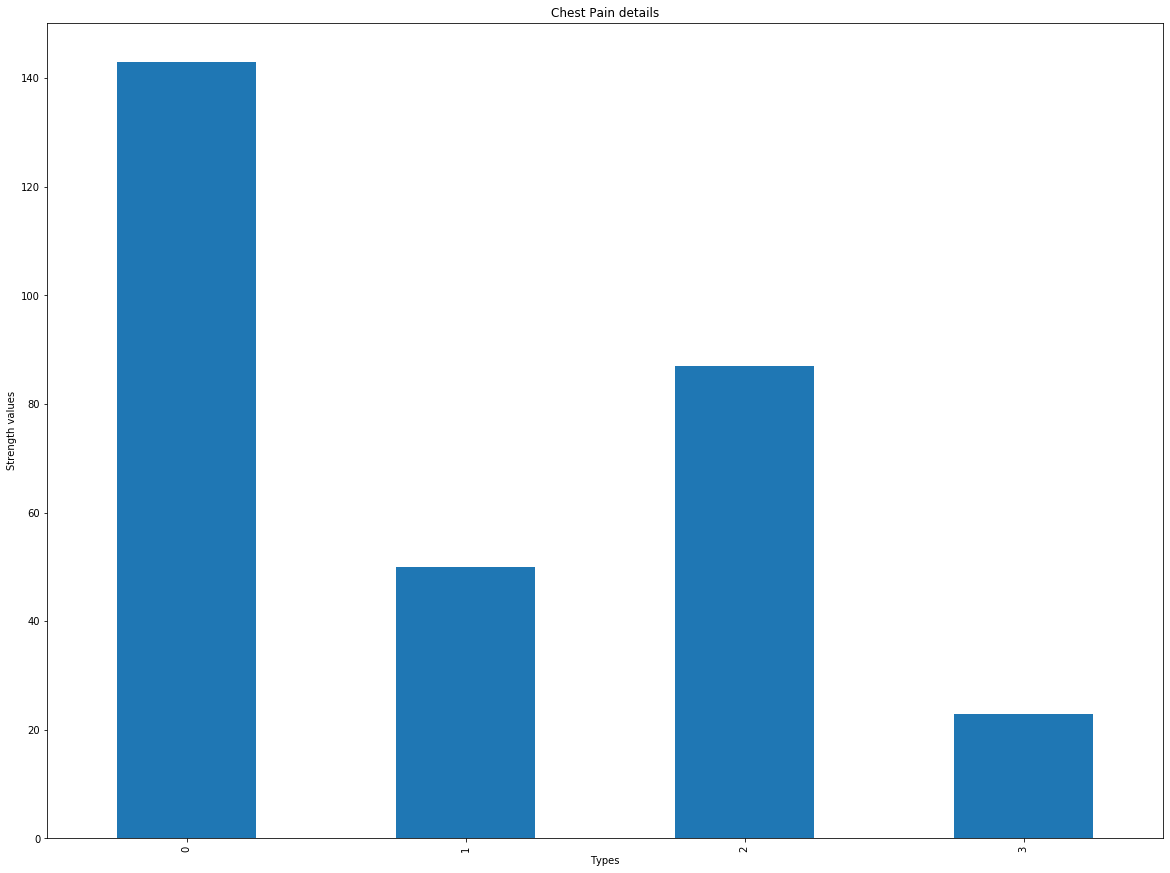

In [9]:
count_classes = p.value_counts(df['cp'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(20,15))
plt.title("Chest Pain details")
plt.xlabel("Types")
plt.ylabel("Strength values")

Text(0.5, 1.0, 'Ratio')

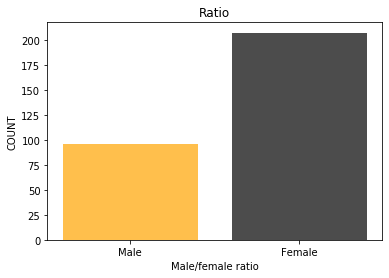

In [10]:

no=sum(df['sex']==0)
yes=sum(df['sex']==1)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['Male','Female']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('Male/female ratio')
plt.ylabel('COUNT')
plt.title('Ratio')

Text(0.5, 1.0, 'Comparison of Diabetic/NONDiabetic Patients')

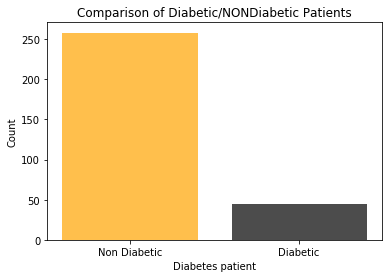

In [11]:

no=sum(df['fbs']==0)
yes=sum(df['fbs']==1)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['Non Diabetic','Diabetic']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('Diabetes patient')
plt.ylabel('Count')
plt.title('Comparison of Diabetic/NONDiabetic Patients')

Text(0.5, 1.0, 'Confirmed and non confirmed heart Patients')

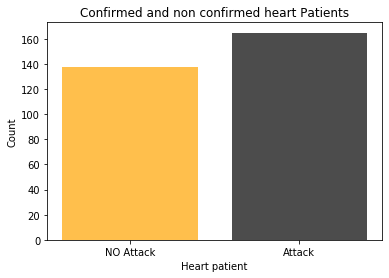

In [12]:

no=sum(df['target']==0)
yes=sum(df['target']==1)
colors=['orange','black']
locations=[1,2]
heights=[no,yes]
labels=['NO Attack','Attack']
plt.bar(locations,heights,color=colors,tick_label=labels,alpha=0.7)
plt.xlabel('Heart patient')
plt.ylabel('Count')
plt.title('Confirmed and non confirmed heart Patients')

Text(0.5, 1.0, 'chestpain by Types')

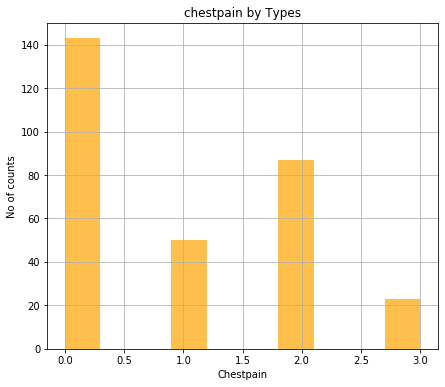

In [13]:
df['cp'].hist(figsize=(7,6), color='orange', alpha=0.7)
plt.xlabel('Chestpain')
plt.ylabel('No of counts')
plt.title('chestpain by Types')

Text(0.5, 1.0, 'ECG Values by counts')

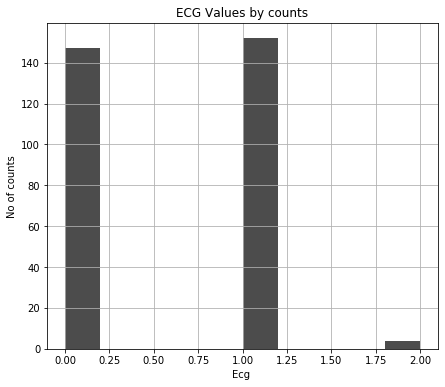

In [14]:
df['restecg'].hist(figsize=(7,6), color='black', alpha=0.7)
plt.xlabel('Ecg ')
plt.ylabel('No of counts')
plt.title('ECG Values by counts')

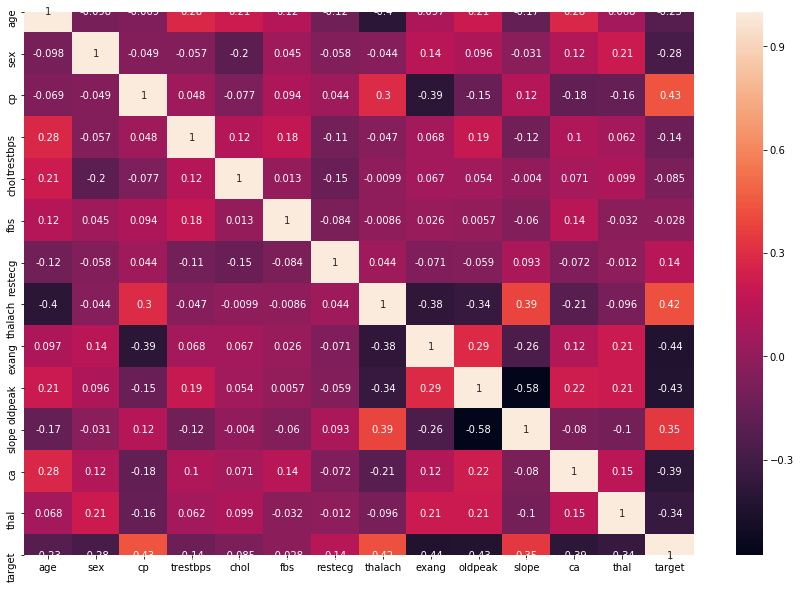

In [15]:
# Heatmap plot diagram
fig, ax = plt.subplots(figsize=(15,10))
s.heatmap(df.corr(), ax=ax, annot=True)

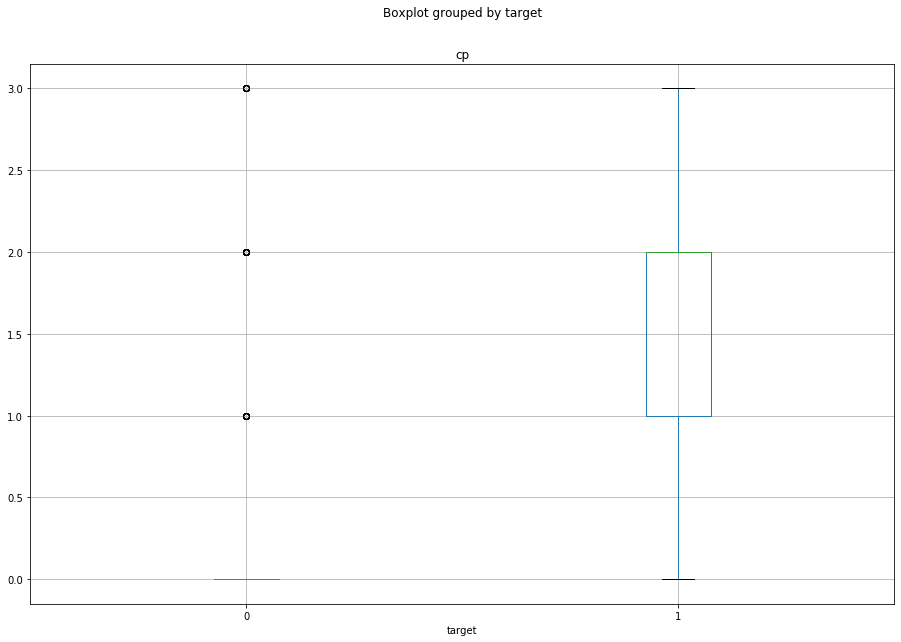

In [16]:
df.boxplot(column="cp", by="target", figsize=(15,10))

0    47.19
2    28.71
1    16.50
3     7.59
Name: cp, dtype: float64

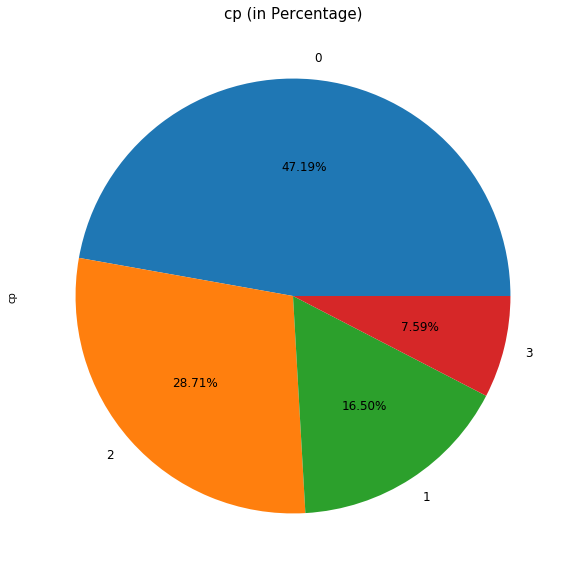

In [17]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)

PropByVar(df, 'cp')

58    6.27
57    5.61
54    5.28
59    4.62
52    4.29
51    3.96
62    3.63
44    3.63
60    3.63
56    3.63
64    3.30
41    3.30
63    2.97
67    2.97
55    2.64
45    2.64
42    2.64
53    2.64
61    2.64
65    2.64
43    2.64
66    2.31
50    2.31
48    2.31
46    2.31
49    1.65
47    1.65
39    1.32
35    1.32
68    1.32
70    1.32
40    0.99
71    0.99
69    0.99
38    0.99
34    0.66
37    0.66
77    0.33
76    0.33
74    0.33
29    0.33
Name: age, dtype: float64

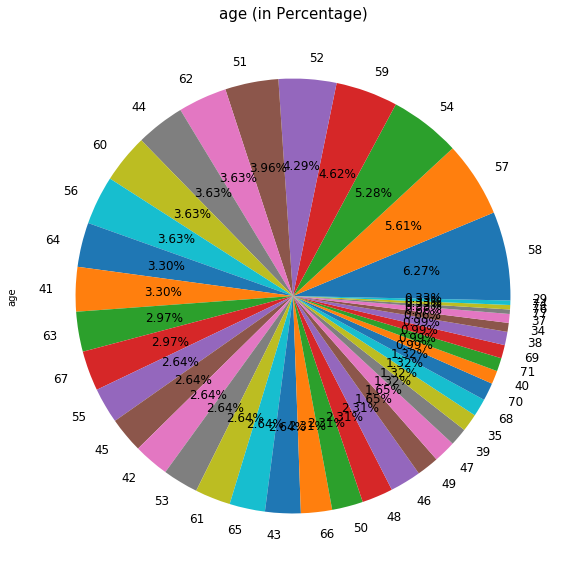

In [18]:
#Propagation by variable
def PropByVar(df, variable):
    dataframe_pie = df[variable].value_counts()
    ax = dataframe_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12)
    ax.set_title(variable + ' (in Percentage)', fontsize = 15)
    return n.round(dataframe_pie/df.shape[0]*100,2)


PropByVar(df, 'age')

Text(0, 0.5, 'Given data counts')

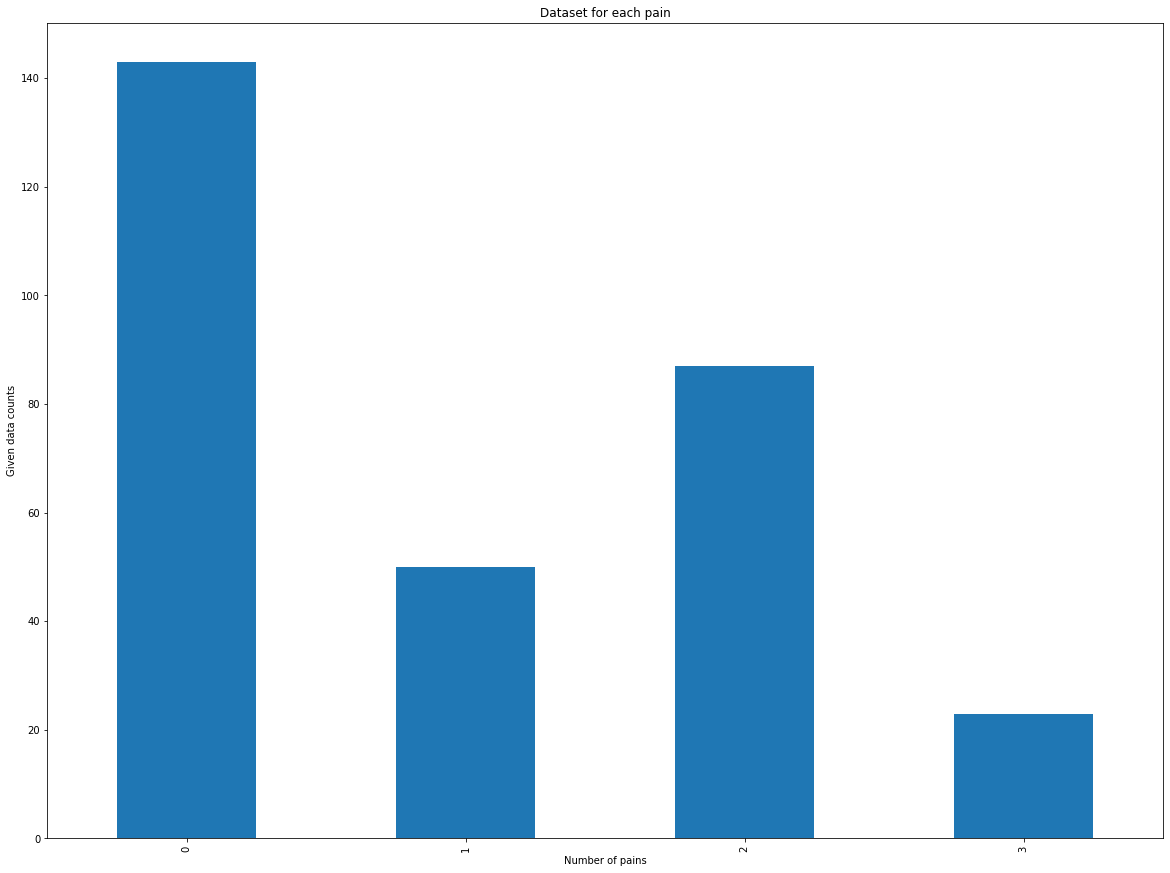

In [19]:
count_classes = p.value_counts(df['cp'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(20,15))
plt.title("Dataset for each pain")
plt.xlabel("Number of pains")
plt.ylabel("Given data counts")

In [21]:

def y_No_y_bar_plot(df, bygroup):
    dataframe_by_Group = p.crosstab(df[bygroup], columns=df["target"], normalize = 'index')
    dataframe_by_Group = n.round((dataframe_by_Group * 100), decimals=2)
    ax = dataframe_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(dataframe_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('Attack Prediction Vs No Attack Prediction (%) (by ' + dataframe_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(dataframe_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return dataframe_by_Group


target,0,1
cp,,
0,72.73,27.27
1,18.00,82.00
2,20.69,79.31
3,30.43,69.57


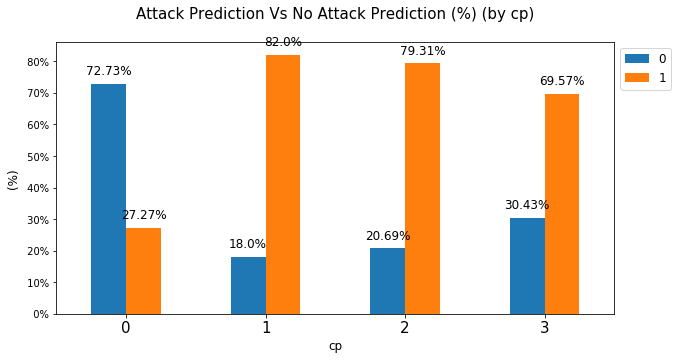

In [22]:
y_No_y_bar_plot(df, 'cp')